In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
#Trapping region for the static phase (first 12 hrs)
date = "20210624"
pos = "Position2"

data = pd.read_csv('D:/Optogenetics/Complete Analysis/Results/'+date+'_'+pos+'_results.csv')
data.to_excel('D:/Optogenetics/Complete Analysis/Results/'+date+'_'+pos+'_results.xlsx', index = None, header=True)

tag = np.asarray(data['particle'])
time = np.asarray(data['frame'])
x = np.asarray(data['x'])
y = np.asarray(data['y'])
all_x = []
all_y = []
all_time = []
all_tag = []
all_vel = []


In [59]:
#MAP = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
MAP = 'winter_r'

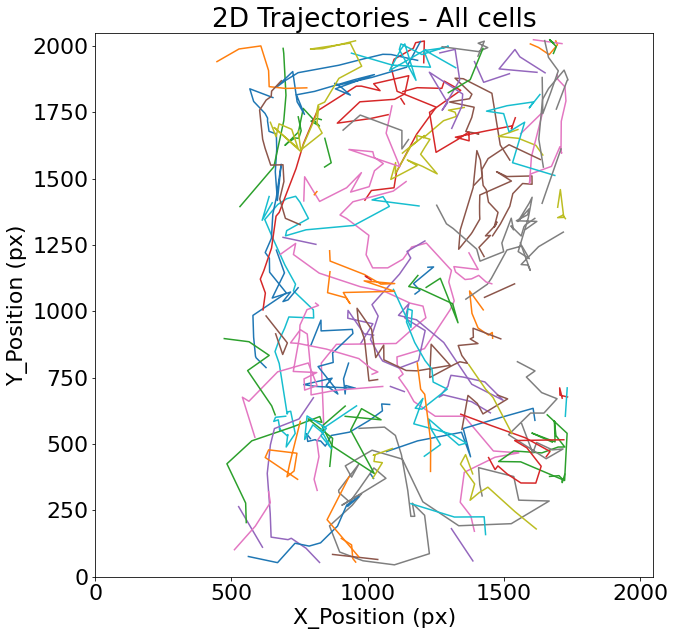

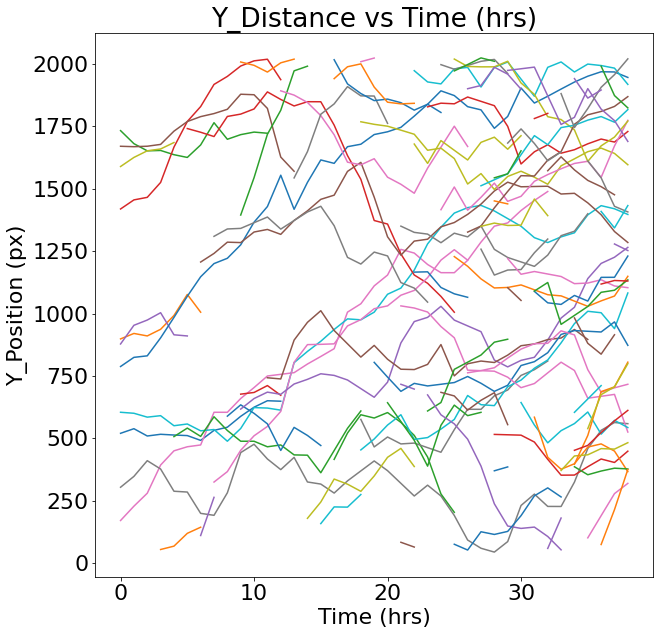

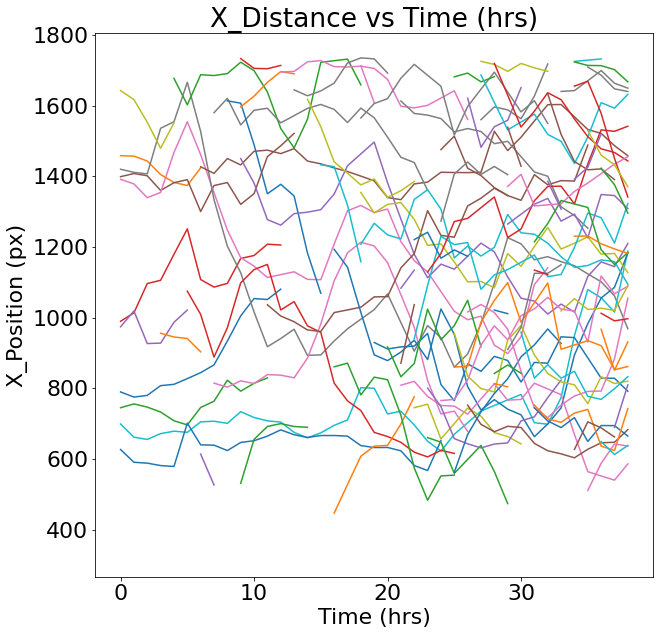

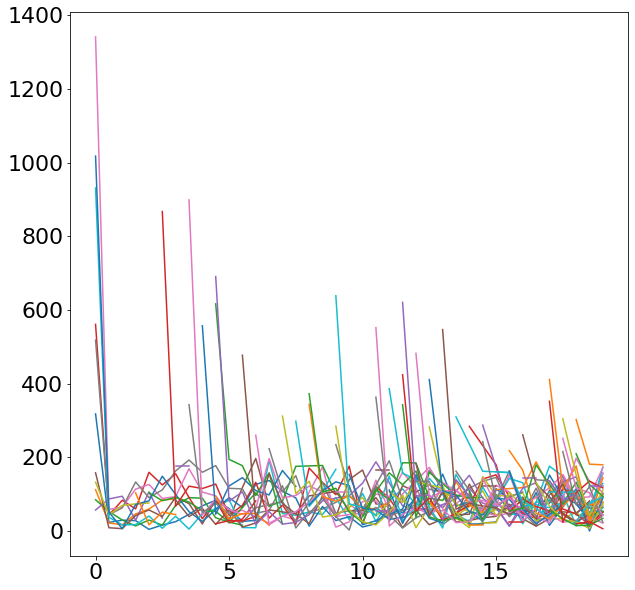

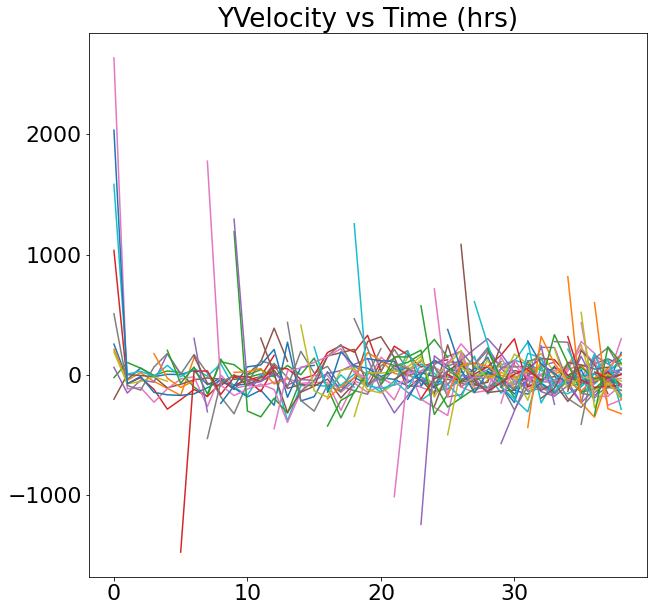

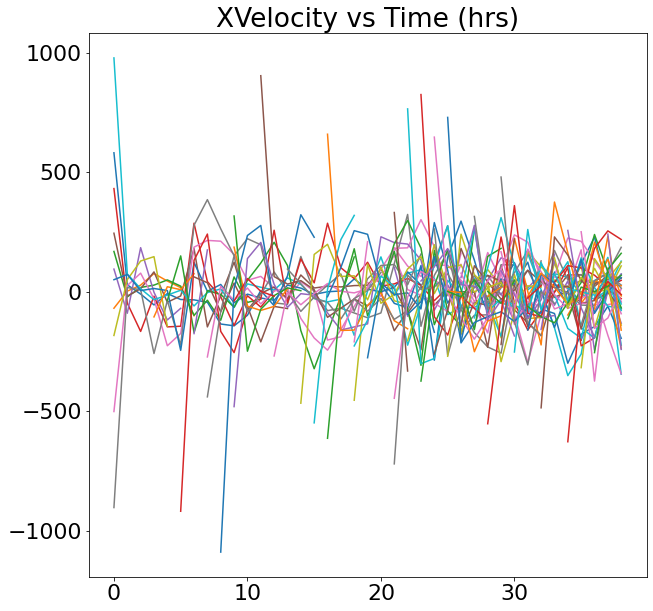

In [60]:
for i in range(max(tag)):
    ind = np.where(tag == i)
    x1 = []
    y1 = []
    time1 = []
    for j in ind: 
        x1.extend(x[j])
        y1.extend(y[j])
        time1.extend(time[j])
    all_x.append(np.asarray(x1))
    all_y.append(np.asarray(y1))
    all_time.append(np.asarray(time1))
    all_tag.append(np.asarray(tag[i]))


############ Plotting all trajectories for the whole duration ##############

plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})
for k in range(len(all_x)):    
    plt.plot(all_x[k], all_y[k], label = all_tag[k])
plt.title('2D Trajectories - All cells')
plt.ylabel('Y_Position (px)')
plt.xlabel('X_Position (px)')
plt.ylim(0, 2048)
plt.xlim(0, 2048)
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/2DCellTraj_'+date+'_'+pos+'.jpg', bbox_inches='tight')
plt.show()


plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})
for k in range(len(all_x)):    
    plt.plot(all_time[k], all_y[k], label = all_tag[k])
plt.title('Y_Distance vs Time (hrs)')
plt.xlabel('Time (hrs)')
plt.ylabel('Y_Position (px)')
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/YDistanceTime_'+date+'_'+pos+'.jpg', bbox_inches='tight')
plt.show()

plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})
for k in range(len(all_x)):    
    plt.plot(all_time[k], all_x[k], label = all_tag[k])
plt.title('X_Distance vs Time (hrs)')
plt.xlabel('Time (hrs)')
plt.ylabel('X_Position (px)')
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/XDistanceTime_'+date+'_'+pos+'.jpg', bbox_inches='tight')
plt.show()
plt.show()

plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})  
for k in range(len(all_x)): 
    distance = np.sqrt((all_x[k]-np.roll(all_x[k], 1))**2 + (all_y[k]-np.roll(all_y[k],  1))**2)
    plt.plot((all_time[k]*30)/60, distance, label = all_tag[k])


plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})
for k in range(len(all_x)): 
    y = all_y[k]
    y_inc = np.roll(y, 1) - y    
    velocity = y_inc/(30/60)
    plt.plot(all_time[k], velocity, label = all_tag[k])
    all_vel.append(velocity)
plt.title('YVelocity vs Time (hrs)')
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/YVelocityTime_'+date+'_'+pos+'.jpg', bbox_inches='tight')
plt.show()

plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})
for k in range(len(all_x)): 
    x = all_x[k]
    x_inc = np.roll(x, 1) - x    
    velocity = x_inc/(30/60)
    plt.plot(all_time[k], velocity, label = all_tag[k])
    all_vel.append(velocity)
plt.title('XVelocity vs Time (hrs)')
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/XVelocityTime_'+date+'_'+pos+'.jpg', bbox_inches='tight')
plt.show()

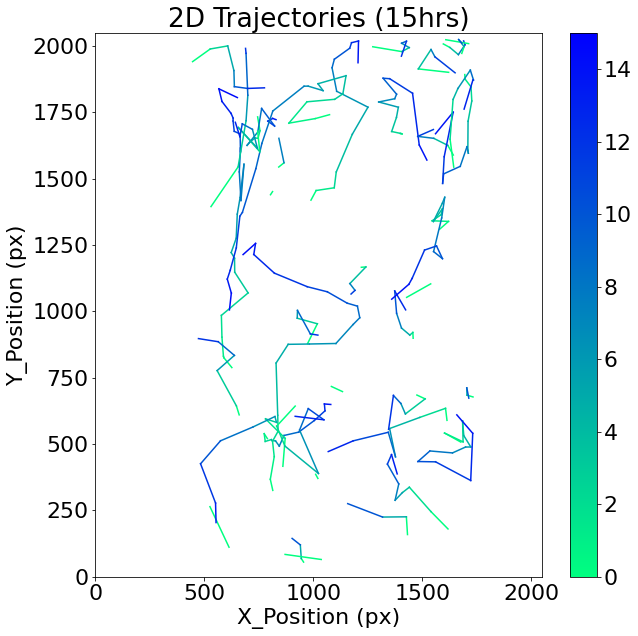

In [61]:
fig = plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})
ax1 = fig.add_subplot(111)
cmaps = plt.get_cmap(MAP)
cnt = 0

############ Plotting trajectories till the static phase ##############
static = 30
for k in range(len(all_x)):   
    ind1 = np.where(all_time[k] < static+1)
    ind2 = np.where(all_time[k] > static+1)
    if np.size(ind1) > 0 and np.size(ind2) == 0:
        cnt = cnt+1
        x = all_x[k]
        y = all_y[k]
        NPOINTS = len(x)  
        ax1.set_prop_cycle(color=[cmaps(1.0*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
        for i in range(NPOINTS-1):
            ax1.plot(x[i:i+2],y[i:i+2])
                
sm = plt.cm.ScalarMappable(cmap=cmaps, norm=plt.Normalize(vmin=0, vmax=(static*30)/60))
plt.colorbar(sm)
plt.title('2D Trajectories (15hrs)')
plt.xlabel('X_Position (px)')
plt.ylabel('Y_Position (px)')
plt.ylim(0, 2048)
plt.xlim(0, 2048)
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/2DCellTrajStatic_'+date+'_'+pos+'.jpg', bbox_inches='tight')


plt.show()
        

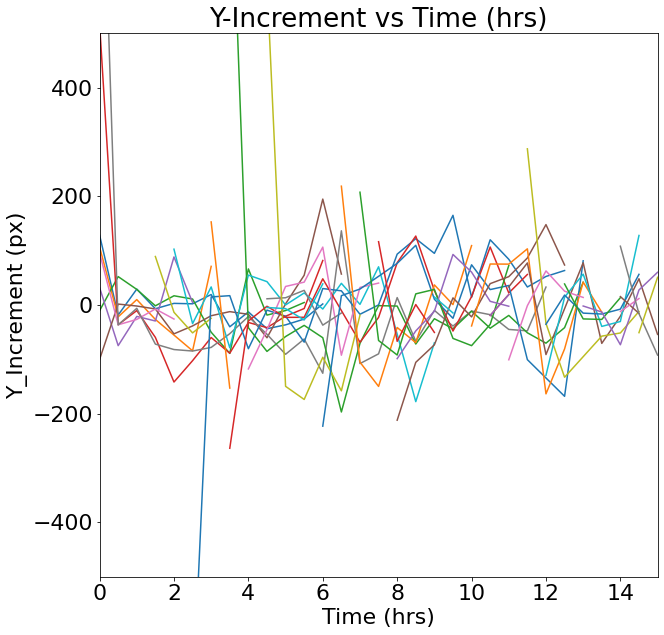

In [62]:
############ Plotting increment in y in the static phase ##############

fig = plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})

#To bin the regions
img_size = np.asarray([2048,2048])

for k in range(len(all_y)):
    ind1 = np.where(all_time[k] < static+1)
    ind2 = np.where(all_time[k] > static+1)
    if np.size(ind1) > 0 and np.size(ind2) == 0:
        y = all_y[k]
        time = all_time[k]
        y_inc = np.roll(y, 1) - y  
        plt.plot((time*30)/60, y_inc)

plt.title('Y-Increment vs Time (hrs)')
plt.ylabel('Y_Increment (px)')
plt.xlabel('Time (hrs)')
plt.ylim(-500,500)
plt.xlim(0,15)
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/Y_Increment_Time_'+date+'_'+pos+'.jpg', bbox_inches='tight')

plt.show()

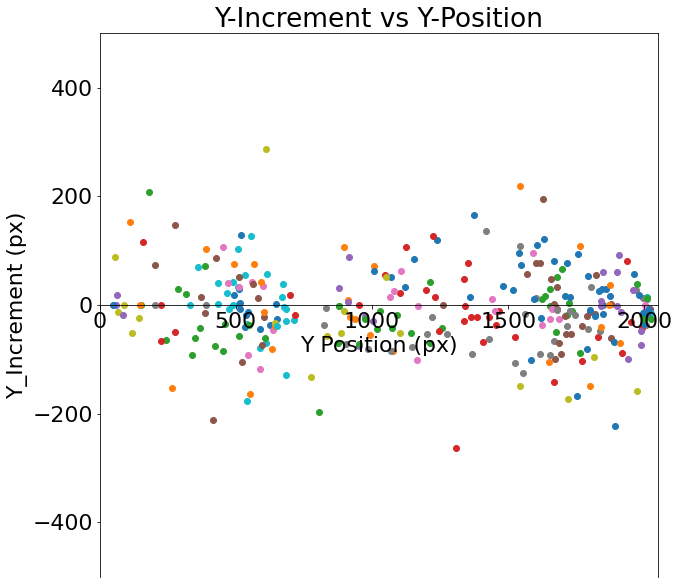

In [63]:
############ Plotting increment in y vs y position ##############

fig = plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 22})
ax = fig.add_subplot(1, 1, 1)

#To bin the regions
img_size = np.asarray([2048,2048])

for k in range(len(all_y)):
    ind1 = np.where(all_time[k] < static+1)
    ind2 = np.where(all_time[k] > static+1)
    if np.size(ind1) > 0 and np.size(ind2) == 0:
        y = all_y[k]
        y_inc = np.roll(y, 1) - y
        ax.scatter(y, y_inc, label = str(k))
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        ax.spines['bottom'].set_position('zero')

plt.title('Y-Increment vs Y-Position')
plt.ylabel('Y_Increment (px)')
plt.xlabel('Y Position (px)')
plt.xlim(0,2048)
plt.ylim(-501,501)
plt.savefig('D:/Optogenetics/Complete Analysis/Plots/Y_Increment_Y_Position_'+date+'_'+pos+'.jpg', bbox_inches='tight')
plt.show()


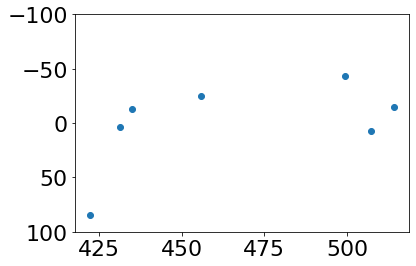

In [57]:
cell = 24
y = all_y[cell]
y_inc = np.roll(y, 1) - y
plt.ylim(100,-100)
plt.scatter(y,y_inc)
plt.show()